In [1]:
import pandas as pd
tweet_vaccine = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/vaccine.csv"), index_col=0)

In [2]:
tweet_vaccine.head()

,id,created_at,full_text,Sentiment,SentimentClass
0,1330833397120454656,2020-11-23 11:19:42,oxford uni newsletter confirms the key princip...,-0.200000,Negative
1,1330833393026621441,2020-11-23 11:19:41,kaarnama vinayak jain bcoz vaccine isafe by...,0.000000,Neutral
2,1330833388987699201,2020-11-23 11:19:40,kieranmurphy lilyallen yes it is. this is t...,0.136364,Positive
3,1330833387469332485,2020-11-23 11:19:39,lynnehall uniofoxford is enough to protect...,0.100000,Positive
4,1330833386185908225,2020-11-23 11:19:39,"cjhancock ah, vaccine peak. one standout sess...",0.000000,Neutral


In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words("english")

print((tweet_vaccine['full_text']).head())
print('-------Remove Stop Word------')
tweet_vaccine['StopWords'] = tweet_vaccine['full_text'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print((tweet_vaccine['StopWords']).head())

0    oxford uni newsletter confirms the key princip...
1     kaarnama   vinayak jain bcoz vaccine isafe by...
2     kieranmurphy   lilyallen yes it is. this is t...
3     lynnehall  uniofoxford   is enough to protect...
4     cjhancock ah, vaccine peak. one standout sess...
Name: full_text, dtype: object
-------Remove Stop Word------
0    oxford uni newsletter confirms key principle a...
1    kaarnama vinayak jain bcoz vaccine isafe kafir...
2    kieranmurphy lilyallen yes is. oxford/astrazen...
3    lynnehall uniofoxford enough protect whole cou...
4    cjhancock ah, vaccine peak. one standout sessi...
Name: StopWords, dtype: object


In [4]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
print((tweet_vaccine['StopWords']).head())
print('-------Stemming------')
tweet_vaccine['Stemming'] = tweet_vaccine['StopWords'].astype(str).apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print((tweet_vaccine['Stemming']).head())

0    oxford uni newsletter confirms key principle a...
1    kaarnama vinayak jain bcoz vaccine isafe kafir...
2    kieranmurphy lilyallen yes is. oxford/astrazen...
3    lynnehall uniofoxford enough protect whole cou...
4    cjhancock ah, vaccine peak. one standout sessi...
Name: StopWords, dtype: object
-------Stemming------
0    oxford uni newslett confirm key principl acces...
1    kaarnama vinayak jain bcoz vaccin isaf kafir k...
2    kieranmurphi lilyallen ye is. oxford/astrazene...
3    lynnehal uniofoxford enough protect whole coun...
4    cjhancock ah, vaccin peak. one standout sessio...
Name: Stemming, dtype: object


In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print((tweet_vaccine['Stemming']).head())
print('-------Lemmazation------')
tweet_vaccine['Lemmatizing'] = tweet_vaccine['Stemming'].astype(str).apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print((tweet_vaccine['Lemmatizing']).head())

0    oxford uni newslett confirm key principl acces...
1    kaarnama vinayak jain bcoz vaccin isaf kafir k...
2    kieranmurphi lilyallen ye is. oxford/astrazene...
3    lynnehal uniofoxford enough protect whole coun...
4    cjhancock ah, vaccin peak. one standout sessio...
Name: Stemming, dtype: object
-------Lemmazation------
0    oxford uni newslett confirm key principl acces...
1    kaarnama vinayak jain bcoz vaccin isaf kafir k...
2    kieranmurphi lilyallen ye is. oxford/astrazene...
3    lynnehal uniofoxford enough protect whole coun...
4    cjhancock ah, vaccin peak. one standout sessio...
Name: Lemmatizing, dtype: object


In [6]:
from textblob import TextBlob
text = tweet_vaccine["Lemmatizing"]

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    tweet_vaccine.at[i, 'Sentiment'] = sentiment
    if sentiment <0.00:
        SentimentClass = 'Negative'
        tweet_vaccine.at[i, 'SentimentClass'] = SentimentClass 
    elif sentiment >0.00:
        SentimentClass = 'Positive'
        tweet_vaccine.at[i, 'SentimentClass'] = SentimentClass 
    else:
        SentimentClass = 'Neutral'
        tweet_vaccine.at[i, 'SentimentClass'] = SentimentClass 

In [7]:
tweet = tweet_vaccine.to_csv("/Users/bahtinur/Desktop/Tweet/vaccine.csv")

In [8]:
import pandas as pd

tweet_vaccine = pd.read_csv(("/Users/bahtinur/Desktop/Tweet/vaccine.csv"), index_col=0)

In [9]:
tweet_vaccine.drop(['StopWords', 'Stemming', 'full_text'], axis=1, inplace = True)
tweet_vaccine.head()

,id,created_at,Sentiment,SentimentClass,Lemmatizing
0,1330833397120454656,2020-11-23 11:19:42,-0.200000,Negative,oxford uni newslett confirm key principl acces...
1,1330833393026621441,2020-11-23 11:19:41,0.000000,Neutral,kaarnama vinayak jain bcoz vaccin isaf kafir k...
2,1330833388987699201,2020-11-23 11:19:40,0.136364,Positive,kieranmurphi lilyallen ye is. oxford/astrazene...
3,1330833387469332485,2020-11-23 11:19:39,0.100000,Positive,lynnehal uniofoxford enough protect whole coun...
4,1330833386185908225,2020-11-23 11:19:39,0.000000,Neutral,"cjhancock ah, vaccin peak. one standout sessio..."


In [10]:
tweet_vaccine.rename(columns={'Lemmatizing':'text'}, inplace=True)
tweet_vaccine.head()

,id,created_at,Sentiment,SentimentClass,text
0,1330833397120454656,2020-11-23 11:19:42,-0.200000,Negative,oxford uni newslett confirm key principl acces...
1,1330833393026621441,2020-11-23 11:19:41,0.000000,Neutral,kaarnama vinayak jain bcoz vaccin isaf kafir k...
2,1330833388987699201,2020-11-23 11:19:40,0.136364,Positive,kieranmurphi lilyallen ye is. oxford/astrazene...
3,1330833387469332485,2020-11-23 11:19:39,0.100000,Positive,lynnehal uniofoxford enough protect whole coun...
4,1330833386185908225,2020-11-23 11:19:39,0.000000,Neutral,"cjhancock ah, vaccin peak. one standout sessio..."


In [11]:
sent = {'Positive':'1','Negative':'2','Neutral':'0'}
tweet_vaccine['SentimentClass'] = tweet_vaccine['SentimentClass'].map(sent)

In [12]:
tweet_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4670 entries, 0 to 4669
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4670 non-null   int64  
 1   created_at      4670 non-null   object 
 2   Sentiment       4670 non-null   float64
 3   SentimentClass  4670 non-null   object 
 4   text            4670 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 218.9+ KB


In [37]:
sent = {'1':'Positive','2':'Negative','0':'Neutral'}
tweet_vaccine['SentimentClass'] = tweet_vaccine['SentimentClass'].map(sent)
tweet_vaccine['SentimentClass'].value_counts()

Neutral     2634
Positive    1467
Negative     569
Name: SentimentClass, dtype: int64

<AxesSubplot:>

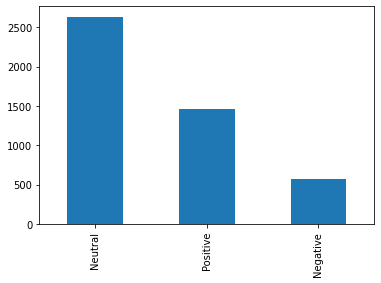

In [38]:
import matplotlib.pyplot as plt
tweet_vaccine['SentimentClass'].value_counts().plot(kind='bar', width=0.5)

In [14]:
X = tweet_vaccine.iloc[:, 4].values
y = tweet_vaccine.iloc[:, 3].values

In [15]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=250, min_df=7, max_df=0.8)
X = vectorizer.fit_transform(X).toarray()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [17]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4670, 250), (4670,), (4203, 250), (4203,), (467, 250), (467,))

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_predRF = rfc.predict(X_test)
score_RF = rfc.score(X_test, y_test)
print(confusion_matrix(y_test,y_predRF))
print(classification_report(y_test,y_predRF))
print(accuracy_score(y_test, y_predRF) * 100)

[[246   3   2]
 [ 47 115   2]
 [ 30   6  16]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       251
           1       0.93      0.70      0.80       164
           2       0.80      0.31      0.44        52

    accuracy                           0.81       467
   macro avg       0.83      0.66      0.70       467
weighted avg       0.82      0.81      0.79       467

80.72805139186295


In [27]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_predSVC = svclassifier.predict(X_test)
score_SVC = svclassifier.score(X_test, y_test)
print(confusion_matrix(y_test,y_predSVC))
print(classification_report(y_test,y_predSVC))
print(accuracy_score(y_test, y_predSVC) * 100)

[[250   1   0]
 [ 52 110   2]
 [ 31   5  16]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       251
           1       0.95      0.67      0.79       164
           2       0.89      0.31      0.46        52

    accuracy                           0.81       467
   macro avg       0.86      0.66      0.70       467
weighted avg       0.84      0.81      0.79       467

80.51391862955032


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predNB = NB_model.predict(X_test)
score_NB = NB_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predNB))
print(classification_report(y_test,y_predNB))
print(accuracy_score(y_test, y_predNB) * 100)

[[247   4   0]
 [ 47 115   2]
 [ 33   7  12]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.85       251
           1       0.91      0.70      0.79       164
           2       0.86      0.23      0.36        52

    accuracy                           0.80       467
   macro avg       0.84      0.64      0.67       467
weighted avg       0.82      0.80      0.78       467

80.08565310492506


In [29]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predLR = LR_model.predict(X_test)
score_LR = LR_model.score(X_test, y_test)
print(confusion_matrix(y_test,y_predLR))
print(classification_report(y_test,y_predLR))
print(accuracy_score(y_test, y_predLR) * 100)

[[247   4   0]
 [ 46 117   1]
 [ 33   5  14]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       251
           1       0.93      0.71      0.81       164
           2       0.93      0.27      0.42        52

    accuracy                           0.81       467
   macro avg       0.87      0.66      0.69       467
weighted avg       0.84      0.81      0.79       467

80.94218415417559


In [30]:
from sklearn.neighbors import KNeighborsClassifier #K nearest neighbors
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
y_predKNN = model_KNN.predict(X_test)
score_KNN = model_KNN.score(X_test,y_test)

print(confusion_matrix(y_test,y_predKNN))
print(classification_report(y_test,y_predKNN))
print(accuracy_score(y_test, y_predKNN) * 100)

[[235  13   3]
 [111  51   2]
 [ 41   1  10]]
              precision    recall  f1-score   support

           0       0.61      0.94      0.74       251
           1       0.78      0.31      0.45       164
           2       0.67      0.19      0.30        52

    accuracy                           0.63       467
   macro avg       0.69      0.48      0.49       467
weighted avg       0.68      0.63      0.59       467

63.38329764453962


In [36]:
from texttable import Texttable
# texttable takes the first reocrd in the list as the column names
# of the table
l = [["CLASSIFICATION", "ACCURACY"],['LogisticRegression', (score_LR * 100)],['RandomForest', (score_RF * 100)],['K-NearestNeighbors',(score_KNN * 100)],['MultinominalNaiveBayes',(score_NB * 100)], ['SupportVector', (score_SVC * 100)]]
table = Texttable()
table.add_rows(l)
print(table.draw())

+------------------------+----------+
|     CLASSIFICATION     | ACCURACY |
+========================+==========+
| LogisticRegression     | 80.942   |
+------------------------+----------+
| RandomForest           | 80.728   |
+------------------------+----------+
| K-NearestNeighbors     | 63.383   |
+------------------------+----------+
| MultinominalNaiveBayes | 80.086   |
+------------------------+----------+
| SupportVector          | 80.514   |
+------------------------+----------+
